In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

# Загружаем выборку Diamonds

1. PRICE: price in US dollars (326-18,823)
2. CARAT: weight of the diamond (0.2--5.01)
3. CUT: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
4. COLOR: diamond colour, from J (worst) to D (best)
5. CLARITY: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
6. X: length in mm (0--10.74)
7. Y: width in mm (0--58.9)
8. Z: depth in mm (0--31.8)
9. DEPTH: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
10. TABLE: width of top of diamond relative to widest point (43--95)

In [28]:
diamonds_df = pd.read_csv('diamonds.csv')

In [29]:
diamonds_df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


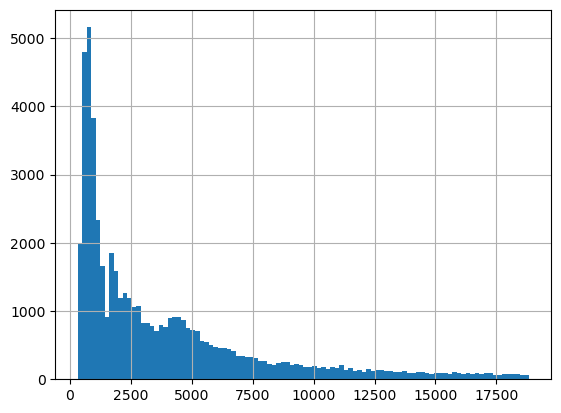

In [30]:
plt.hist(diamonds_df['price'], bins=100)
plt.grid();

# Подготовка данных

In [31]:
features = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']
target = ['price']

In [32]:
cut_transform = {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}
clarity_transform = {'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7}
color_transorm = {'D': 0, 'E': 1, 'F': 2, 'G': 3, 'H': 4, 'I': 5, 'J': 6}

In [33]:
diamonds_df['cut'] = diamonds_df['cut'].apply(lambda x: cut_transform.get(x))
diamonds_df['color'] = diamonds_df['color'].apply(lambda x: color_transorm.get(x))
diamonds_df['clarity'] = diamonds_df['clarity'].apply(lambda x: clarity_transform.get(x))

In [34]:
X = diamonds_df[features].copy().values
y = diamonds_df[target].values

In [35]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=47, test_size=0.3)

# Обучаем модель линейной регрессии

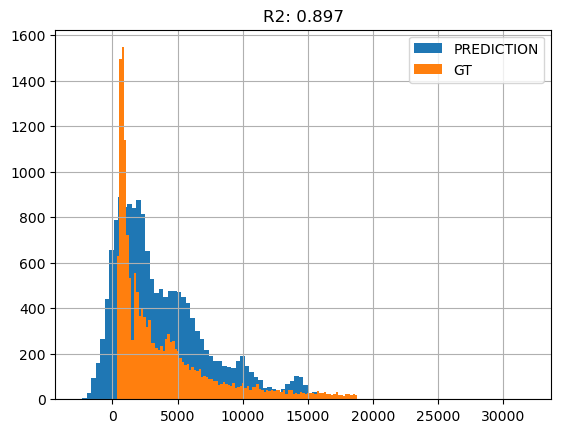

In [37]:
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
score = r2_score(y_pred, y_test)
plt.title(f'R2: {str(score)[:5]}')
plt.hist(y_pred.reshape(1, -1)[0], bins=100, label='PREDICTION')
plt.hist(y_test.reshape(1, -1)[0], bins=100, label='GT')
plt.legend()
plt.grid();

# Создаём модель MLP для задачи регрессии

In [99]:
import numpy as np

class MLPRegressor:
    def __init__(
        self,
        hidden_layer_sizes=(100, 100),
        learning_rate=0.001,
        max_iter=10,
    ):
        self.w1 = np.random.randn(9, hidden_layer_sizes[0]) * 0.01
        self.w2 = np.random.randn(hidden_layer_sizes[0], hidden_layer_sizes[1]) * 0.01
        self.w3 = np.random.randn(hidden_layer_sizes[1], 1) * 0.01
        
        self.b1 = np.zeros(hidden_layer_sizes[0])
        self.b2 = np.zeros(hidden_layer_sizes[1])
        self.b3 = np.zeros(1)
        
        self.learning_rate = learning_rate
        self.max_iter = max_iter
    
    # Сигмоида
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    # Производная сигмоиды
    def sigmoid_derivative(self, x):
        return self.sigmoid(x) * (1 - self.sigmoid(x))

    def forward_pass(self, X):
        z1 = X @ self.w1 + self.b1
        a1 = self.sigmoid(z1)
        
        z2 = a1 @ self.w2 + self.b2
        a2 = self.sigmoid(z2)
        
        z3 = a2 @ self.w3 + self.b3
        output = self.sigmoid(z3)
        
        return output  
    
    def train(self, X, y):
        for i in range(self.max_iter):
            # Прямой проход
            z1 = X @ self.w1 + self.b1
            a1 = self.sigmoid(z1)
        
            z2 = a1 @ self.w2 + self.b2
            a2 = self.sigmoid(z2)
            
            z3 = a2 @ self.w3 + self.b3
            output = self.sigmoid(z3)  

            # Ошибка
            error = output - y

            # Обратное распространение ошибки
            grad_w3 = a2.T @ error 
            grad_b3 = np.sum(error, axis=0)    
            
            delta2 = (error @ self.w3.T) * self.sigmoid_derivative(z2)
            grad_w2 = a1.T @ delta2
            grad_b2 = np.sum(delta2, axis=0)
            
            delta1 = (delta2 @ self.w2.T) * self.sigmoid_derivative(z1)
            grad_w1 = X.T @ delta1
            grad_b1 = np.sum(delta1, axis=0)
            
            # Обновление весов и смещений
            self.w3 -= self.learning_rate * grad_w3 
            self.b3 -= self.learning_rate * grad_b3
            
            self.w2 -= self.learning_rate * grad_w2 
            self.b2 -= self.learning_rate * grad_b2
            
            self.w1 -= self.learning_rate * grad_w1 
            self.b1 -= self.learning_rate * grad_b1
    
    def predict(self, X):
        return self.forward_pass(X)


# Проверяем модель MLP на выборке Diamonds

In [100]:
mlp = MLPRegressor()
mlp.train(X_train, y_train)
mlp_pred = mlp.predict(X_test)
mlp_score = r2_score(mlp_pred, y_test)

C:\Users\Максим\AppData\Local\Temp\ipykernel_7164\988052410.py:23: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [101]:
mlp_score

0.0

In [102]:
X_train.shape

(37758, 9)